In [1]:
# Copyright 2021 IITK EE604A Image Processing. All Rights Reserved.
# 
# Licensed under the MIT License. Use and/or modification of this code outside of EE604 must reference:
#
# © IITK EE604A Image Processing 
#
# Author: Dheeraj Bharti, Chiranjeev Prachand and Prof Tushar Sandhan, Department of Electrical Engineering, IIT Kanpur

Did you notice the slow speeds of the previous parts where lines and circles are detected using Hough Transform.

You can calculate run time of the previous codes using time() function in time module.

List atleast three reasons for the algorithm taking so much time.

In [2]:
reasons = '''1.HT Algorithm is taking time beacuse thetas are given in a range which are not appropriate angles corresponding to the edge pixels.
2.Complexity of search time is increasing exponentially with the number of model parameter thereby the average number of votes cast in a single bin is very low, and those bins corresponding to
a real figure in the image do not necessarily appear to have a much higher number of votes than their neighbors.
3.Range of radius is increases'''
print(reasons)

1.HT Algorithm is taking time beacuse thetas are given in a range which are not appropriate angles corresponding to the edge pixels.
2.Complexity of search time is increasing exponentially with the number of model parameter thereby the average number of votes cast in a single bin is very low, and those bins corresponding to
a real figure in the image do not necessarily appear to have a much higher number of votes than their neighbors.
3.Range of radius is increases


Suggest atleast two methods to speed up the algorithm.

In [3]:
methods = '''Based on computation time,I suggest following two methods:
1.Gradient Information method for Circle Hough Transform 
2.Progressive Probabilistic Hough Transform(PPHT)'''
print(methods)

Based on computation time,I suggest following two methods:
1.Gradient Information method for Circle Hough Transform 
2.Progressive Probabilistic Hough Transform(PPHT)


Implement any one of the above methods on either line or circle detection code (your own code) and calculate the time taken by your method.

In [4]:
import argparse
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
from collections import defaultdict
from google.colab.patches import cv2_imshow
import timeit
start = timeit.default_timer()

In [5]:

def find_hough_circles(image, edge_image, r_min, r_max, delta_r, num_thetas, bin_threshold, post_process = True):

  img = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  img_height, img_width = img.shape[:2]
  gX = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
  gY = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
  mag, phase = cv2.cartToPolar(gX, gY, angleInDegrees = True)
  rs = np.arange(r_min,r_max,step = delta_r)

  cos_t= np.zeros((img_height,img_width))
  sin_t= np.zeros((img_height,img_width))
  for i in range(img_height):
    for j in range(img_width):
      cos_t[i,j] = np.cos(phase[i,j])
      sin_t[i,j] = np.sin(phase[i,j])

  accumulator = defaultdict(int)
  for x in range(img_height):
    for y in range(img_width):
      if (edge_image[x,y]>0):
        for r in rs:
          x_center = x - int(r*cos_t[x,y])
          y_center = y - int(r*sin_t[x,y])
          accumulator[(x_center, y_center, r)] += 1 
  
  
  output_img = image.copy()
  max_vote=0
  centre =[]
  out_circles = []
  accumulator1 = defaultdict(int)

  acc_list = sorted(accumulator.items(), key=lambda i: -i[1])
  for candidate_circle, votes in acc_list:
    if (max_vote<votes):
      max_vote = votes
    x1, y1, r1 = candidate_circle
    if votes >= max_vote*bin_threshold:
      centre.append((x1,y1))
  
  for h in range(img_height):
    for w in range(img_width):
      if (edge_image[h,w] >0):
        for x2, y2 in centre:
          r2 = int(np.round(math.sqrt((h-x2)**2 + (w-y2)**2)))
          accumulator1[(x2, y2, r2)] += 1 

  max_vote=0
  acc_list = sorted(accumulator1.items(), key=lambda i: -i[1])
  for candidate_circle, votes in acc_list:
    if max_vote<votes:
      max_vote = votes
    x3, y3, r3 = candidate_circle
    # print(x3, y3, r3, votes)
    if votes >=max_vote*bin_threshold: 
      out_circles.append((x3, y3, r3, votes))
      

  if post_process :
    pixel_threshold = 5
    postprocess_circles = []
    for x, y, r, v in out_circles:
      if all(abs(x - xc) > pixel_threshold or abs(y - yc) > pixel_threshold or abs(r - rc) > pixel_threshold 
        for xc, yc, rc, v in postprocess_circles):postprocess_circles.append((x, y, r, v))
    out_circles = postprocess_circles
  
  
  for x, y, r, v in out_circles:
    output_img = cv2.circle(output_img, (x,y), r, (123,15,125), 2)
  
  return output_img, out_circles


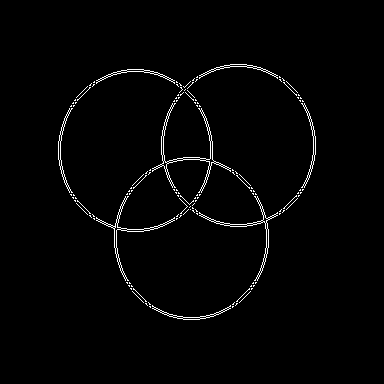

Detecting Hough Circles Started!


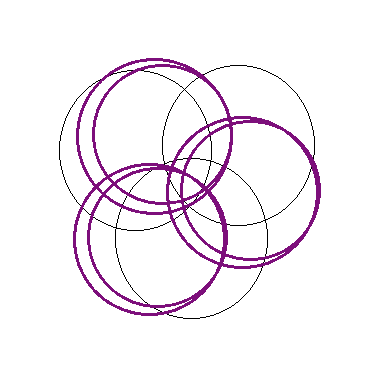

Detecting Hough Circles Complete!
Program Executed in 5.497263857000007 seconds


In [6]:
###################################################################
## Try to vary these values and observe the change in output   ###
## The best values may or may not be the given values          ####
r_min = 20
r_max = 200
delta_r = 1
num_thetas = 100
bin_threshold = 0.52
min_edge_threshold = 100
max_edge_threshold = 200
###################################################################

input_img = cv2.imread('pic2.png')
edge_image = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
edge_image = cv2.Canny(edge_image, min_edge_threshold, max_edge_threshold)
cv2_imshow(edge_image)
cv2.waitKey(0)

if edge_image is not None:
    
  print ("Detecting Hough Circles Started!")
  circle_img, circles = find_hough_circles(input_img, edge_image, r_min, r_max, delta_r, num_thetas, bin_threshold)
  cv2_imshow( circle_img)
  cv2.waitKey(0)
    
    
else:
  print ("Error in input image!")
        
print ("Detecting Hough Circles Complete!")
stop = timeit.default_timer()
execution_time = stop - start
print("Program Executed in " +str(execution_time),"seconds")
